In [5]:
using Plots
using LinearAlgebra

In [173]:
function init(x)
    -1. + x^2
end
function init2(x)
    4.0 * sin(4. *x*pi)
end
function periodic(phi,i)
    [phi[i,end]; phi[i,:]; phi[i,1]]
end
function flux(phibc,i,nx,u)
    if typeof(u) == Float64
        F[i,:] =   0.5*u*(phibc[i,2:nx+2] + phibc[i,1:nx+1])- 0.5*abs(u)*( phibc[i,2:nx+2] - phibc[i,1:nx+1]);
        R[i,:] = F[i,2:nx+1] - F[i,1:nx];
    elseif typeof(u) == Array{Float64,1}
        F[i,:] =   0.5*u[i+1]*(phibc[i,2:nx+2] + phibc[i,1:nx+1])- 0.5*abs(u[i+1])*( phibc[i,2:nx+2] - phibc[i,1:nx+1]);
        R[i,:] = F[i,2:nx+1] - F[i,1:nx];
    end
end
function sign1(x,dx)
    x/sqrt(x.^2 +dx^2)
end

sign1 (generic function with 1 method)

In [211]:
nt = 8000
nx = 100
Tmax = 10.
Xmax = 2.
dt = Tmax/nt
dx = 2*Xmax/nx
x = -Xmax:dx:Xmax;

xmid = 0.5*(x[1:nx] + x[2:nx+1])
sol = zeros(nt+1,nx)
phi = zeros(nt+1,nx)
phi2 = zeros(nt+1,nx)
phibc = zeros(nt,nx+2)
phibc2 = zeros(nt,nx+2)
phi0 = zeros(1,nx)
err = zeros(1,nt)
F = zeros(nt,nx + 1)
R = zeros(nt,nx)
phi[1,:] = init.(xmid);
phi2[1,:] = init.(xmid);
u = 4.;
#tspawn = 0:dt:Tmax;
#u = init2.(tspawn);
#flux(phibc,i,nx,u)

In [212]:
#gr(show = :ijulia)
for i = 1:nt
    phibc[i,:] = periodic(phi,i)
    phibc2[i,:] = periodic(phi2,i)
    phi[i+1,:] = phi[i,:] - (dt/dx)*flux(phibc,i,nx,u);
    phi2[i+1,:] = phi2[i,:] - (dt/dx)*flux(phibc2,i,nx,u);
    a = sign1.(phi2[i+1,:],dx)*(1. - norm(flux(phibc2,i,nx,1.)))
    for j = 1:500
        if norm(a) > 0.00001
            phi2[i+1,:] = phi2[i+1,:] + dt*a
            phibc2[i,:] = periodic(phi2,i)
            a = sign1.(phi2[i+1,:],dx)*(1. - norm(flux(phibc2,i,nx,1.)))
            #println(norm(a))
        end
    end
    #display(plot(xmid,[phi[i,:],phi2[i,:],phi0[1,:],phi[1,:]], ylims = (-2,3), legend = false))
end

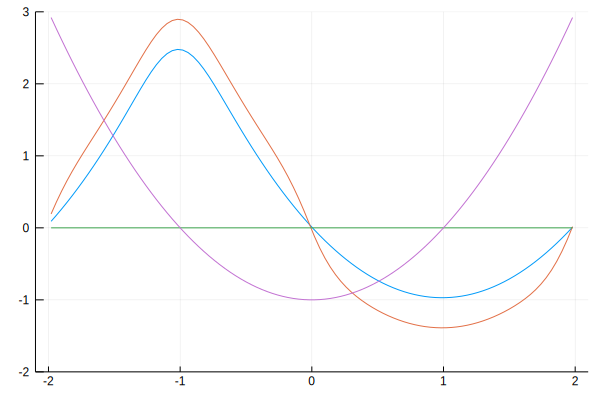

┌ Info: Saved animation to 
│   fn = /Users/tomas/PhD/2019-2020/julia/test/constant.gif
└ @ Plots /Users/tomas/.julia/packages/Plots/Iuc9S/src/animation.jl:95


In [210]:
anim = @animate for i=1:100
    plot(xmid,[phi[i,:],phi2[i,:],phi0[1,:],phi[1,:]], ylims = (-2,3), legend = false)
end
gif(anim, "/Users/tomas/PhD/2019-2020/julia/test/constant.gif", fps = 15);